**Background**

The objective is to identify factors contributing to up and down of NQ price. Here, we will perform basic correlation analysis between the various indicators and dependant variables (up,down). This includes preprocessing, filtering out irrelevant features, and droping features with high multicollinearity. Finally, we will evaluates the remaining features correlations with 'up' and 'down', presenting the top five features correlated with each to highlight key factors influencing price changes. Note, this is rudmentary eda analysis conducted to present my train of thought and results should not be used beyond educational purposes.

Thanks,
James



**------------------------------------------------------------------**

**Possible Definitions for VIX indicators**
1. **CON**: Confidence Interval
2. **TIM**: Time
3. **Boolinger%**: Bollinger Bands Percentage
4. **MACD1HR**: MACD for 1 Hour
5. **STOCH1H**: Stochastic Oscillator for 1 Hour
6. **OICP**: Open Interest in Call Positions
7. **OIPP**: Open Interest in Put Positions
8. **CP**: Closing Price
9. **PP**: Pivot Point
10. **HIST**: MACD Histogram
11. **MACDDIF**: MACD Difference
12. **STOCH**: Stochastic Oscillator
13. **MACD**: Moving Average Convergence Divergence
14. **1-STOCH**: Inverse Stochastic Oscillator
15. **ocpt**: Open Contracts for Puts
16. **oppt**: Open Contracts for Calls
17. **1=MACD**: Binary Indicator for MACD
18. **NCRAT**: Net Change Rate
19. **NORAT**: Normalized Rate
20. **CPT**: Current Price Target
21. **PPT**: Past Price Target
22. **NCDIF-v**: Net Change Difference (Volume)
23. **NODIF-v**: Net Open Interest Difference (Volume)
24. **LAST**: Last Price
25. **DAY%**: Daily Percentage Change
26. **20ma**: 20-Day Moving Average
27. **50ma**: 50-Day Moving Average


**------------------------------------------------------------------**

**Load Revelant Data**

In [17]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('data.csv')

df.head()


,up,down,TODAYDATE,LAST,TIM,CON,TIM.1,Boolinger%,MACD1HR-DIF,STOCH1HR-DIF,...,NCRAT,NORAT,CPT,PPT,NCDIF-v,NODIF-v,LAST.1,DAY%,20ma,50ma
0,24,-24,4-Oct-24,20206.0,1554,0.00,1554,32.61,-0.01,0.71,...,1.2,2.3,53998,45549,0.04,0.09,18.69,-3.75,-0.03,-0.48
1,22,3,4-Oct-24,20208.0,1551,-0.01,1551,26.98,0.00,3.55,...,1.1,2.2,52764,46022,0.00,-0.04,18.67,-3.86,-0.07,-0.51
2,21,4,4-Oct-24,20209.0,1548,-0.03,1548,6.66,-0.02,3.06,...,1.1,2.3,52381,45627,0.01,0.01,18.57,-4.42,-0.18,-0.61
3,11,13,4-Oct-24,20219.0,1545,-0.03,1545,-10.13,-0.03,-0.92,...,1.1,2.3,51814,45647,-0.03,-0.09,18.50,-4.81,-0.28,-0.69
4,15,9,4-Oct-24,20215.0,1542,-0.02,1542,7.62,-0.01,-1.38,...,1.2,2.3,51841,44314,-0.04,-0.06,18.64,-4.02,-0.17,-0.56


**------------------------------------------------------------------**

**Data Cleansing and Preprocessing**

I will be handling null values, normalizing data, and any other needed data cleansing/processing in this section

In [18]:
# Count of null values for each column
null_counts = df.isnull().sum()

# Filtering to show only columns with null values
null_counts = null_counts[null_counts > 0]

# Printing the count along with column names
print("Count of null values in each column:")
for column, count in null_counts.items():
    print(f"Column '{column}': {count} null values")

Count of null values in each column:
Column 'NCRAT': 2 null values
Column 'NCDIF-v': 4 null values


In [41]:
# Backward fill null values
df['NCRAT'] = df['NCRAT'].bfill()
df['NCDIF-v'] = df['NCDIF-v'].bfill()

null_columns = df.columns[df.isnull().any()]

print(null_columns)

Index([], dtype='object')


In [20]:
# Converting to datetime with the specified format
df['TODAYDATE'] = pd.to_datetime(df['TODAYDATE'], format='%d-%b-%y', errors='coerce')

In [21]:
df.head()

,up,down,TODAYDATE,LAST,TIM,CON,TIM.1,Boolinger%,MACD1HR-DIF,STOCH1HR-DIF,...,NCRAT,NORAT,CPT,PPT,NCDIF-v,NODIF-v,LAST.1,DAY%,20ma,50ma
0,24,-24,2024-10-04,20206.0,1554,0.00,1554,32.61,-0.01,0.71,...,1.2,2.3,53998,45549,0.04,0.09,18.69,-3.75,-0.03,-0.48
1,22,3,2024-10-04,20208.0,1551,-0.01,1551,26.98,0.00,3.55,...,1.1,2.2,52764,46022,0.00,-0.04,18.67,-3.86,-0.07,-0.51
2,21,4,2024-10-04,20209.0,1548,-0.03,1548,6.66,-0.02,3.06,...,1.1,2.3,52381,45627,0.01,0.01,18.57,-4.42,-0.18,-0.61
3,11,13,2024-10-04,20219.0,1545,-0.03,1545,-10.13,-0.03,-0.92,...,1.1,2.3,51814,45647,-0.03,-0.09,18.50,-4.81,-0.28,-0.69
4,15,9,2024-10-04,20215.0,1542,-0.02,1542,7.62,-0.01,-1.38,...,1.2,2.3,51841,44314,-0.04,-0.06,18.64,-4.02,-0.17,-0.56


*Need to normalize columns given the different scale of the features*

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
# Specify columns to normalize
columns_to_normalize = df.columns.difference(['up', 'down', 'TODAYDATE', 'TIM', 'TIM.1'])

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the normalized DataFrame
df.head()

,up,down,TODAYDATE,LAST,TIM,CON,TIM.1,Boolinger%,MACD1HR-DIF,STOCH1HR-DIF,...,NCRAT,NORAT,CPT,PPT,NCDIF-v,NODIF-v,LAST.1,DAY%,20ma,50ma
0,24,-24,2024-10-04,0.855475,1554,0.378151,1554,0.413256,0.333333,0.471015,...,0.252174,0.175439,0.444340,0.536022,0.487009,0.606021,0.518957,0.016401,0.353333,0.142512
1,22,3,2024-10-04,0.859922,1551,0.369748,1551,0.386177,0.363636,0.509936,...,0.247826,0.157895,0.434186,0.541589,0.485741,0.589005,0.514218,0.015358,0.340000,0.135266
2,21,4,2024-10-04,0.862146,1548,0.352941,1548,0.288442,0.303030,0.503221,...,0.247826,0.175439,0.431034,0.536940,0.486058,0.595550,0.490521,0.010049,0.303333,0.111111
3,11,13,2024-10-04,0.884380,1545,0.352941,1545,0.207686,0.272727,0.448678,...,0.247826,0.175439,0.426368,0.537175,0.484791,0.582461,0.473934,0.006352,0.270000,0.091787
4,15,9,2024-10-04,0.875486,1542,0.361345,1542,0.293059,0.333333,0.442374,...,0.252174,0.175439,0.426591,0.521486,0.484474,0.586387,0.507109,0.013841,0.306667,0.123188


**------------------------------------------------------------------**

**Exploratory Data Analysis**

I will mainly be looking obtain top features that may contribute for the up and down of the price. Note, I am not conducting a times series analysis as this is not the objective

**Check Correlation between features and up/down**

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

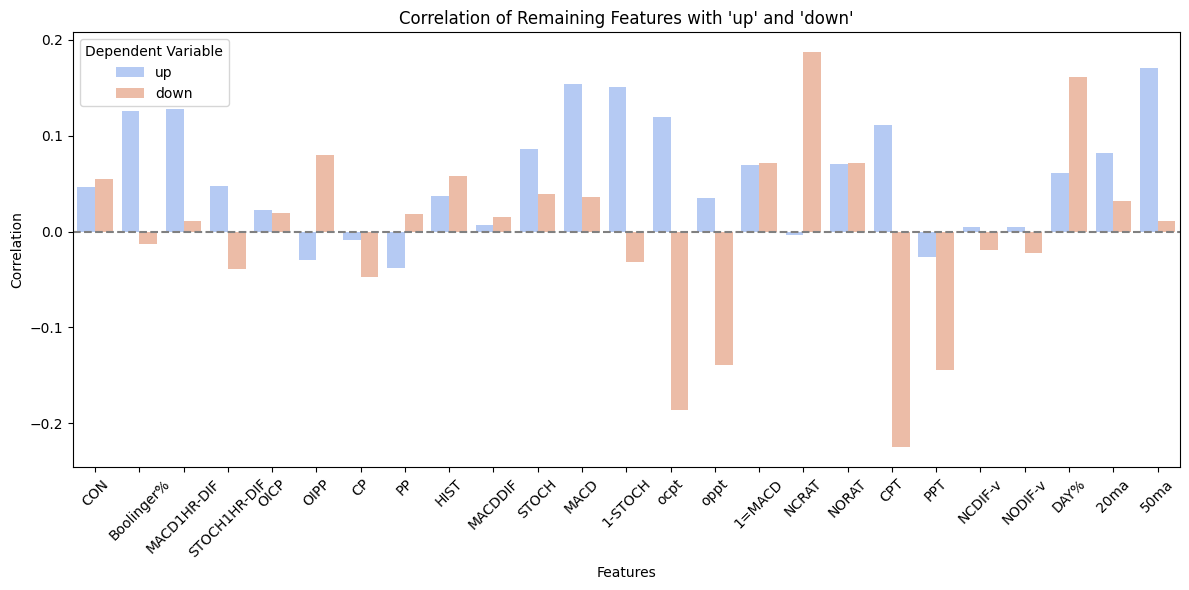

In [26]:
# List of columns to exclude
exclude_columns = ['up', 'down', 'TODAYDATE', 'LAST','TIM','TIM.1','LAST.1']

# Calculate the correlation of remaining features with 'up' and 'down'
correlation_with_up = df.corr()['up'].drop(exclude_columns, errors='ignore')  # Ignore excluded columns
correlation_with_down = df.corr()['down'].drop(exclude_columns, errors='ignore')  # Ignore excluded columns

# Create a DataFrame for plotting
correlation_df = pd.DataFrame({
    'up': correlation_with_up,
    'down': correlation_with_down
}).reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Melt the DataFrame for easier plotting
correlation_melted = correlation_df.melt(id_vars='index', var_name='Dependent Variable', value_name='Correlation')

# Create the bar plot
sns.barplot(data=correlation_melted, x='index', y='Correlation', hue='Dependent Variable', palette='coolwarm')

# Add labels and title
plt.title("Correlation of Remaining Features with 'up' and 'down'")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.legend(title='Dependent Variable')

# Show the plot
plt.tight_layout()
plt.show()

In [28]:
# Create a DataFrame for easier handling
correlation_df = pd.DataFrame({
    'Feature': correlation_with_up.index,
    'Correlation with up': correlation_with_up.values,
    'Correlation with down': correlation_with_down.values
})

# Sort the DataFrame based on correlation with 'up' and 'down'
top_up = correlation_df.nlargest(5, 'Correlation with up')
top_down = correlation_df.nlargest(5, 'Correlation with down')

# Display the top 5 correlated features
print("Top 5 Features Correlated with 'up':")
print(top_up[['Feature', 'Correlation with up']])
print("\nTop 5 Features Correlated with 'down':")
print(top_down[['Feature', 'Correlation with down']])

Top 5 Features Correlated with 'up':
        Feature  Correlation with up
24         50ma             0.170247
11         MACD             0.153777
12      1-STOCH             0.151132
2   MACD1HR-DIF             0.128275
1    Boolinger%             0.125793

Top 5 Features Correlated with 'down':
   Feature  Correlation with down
16   NCRAT               0.187347
22    DAY%               0.160927
5     OIPP               0.079782
15  1=MACD               0.071882
17   NORAT               0.071368


**Observations**

- Here are the top 5 correlated indicators affiliated with up and down

**Check for correlation between the top 5 Indicators**

I will be looking to identify highly correlated features amongst the top 5 and removing it

In [36]:
# Similarly, sanitize the top features to remove any extra spaces
top_up['Feature'] = top_up['Feature'].str.strip()
top_down['Feature'] = top_down['Feature'].str.strip()

# Combine top features from both 'up' and 'down'
top_features = pd.concat([top_up['Feature'], top_down['Feature']]).unique()

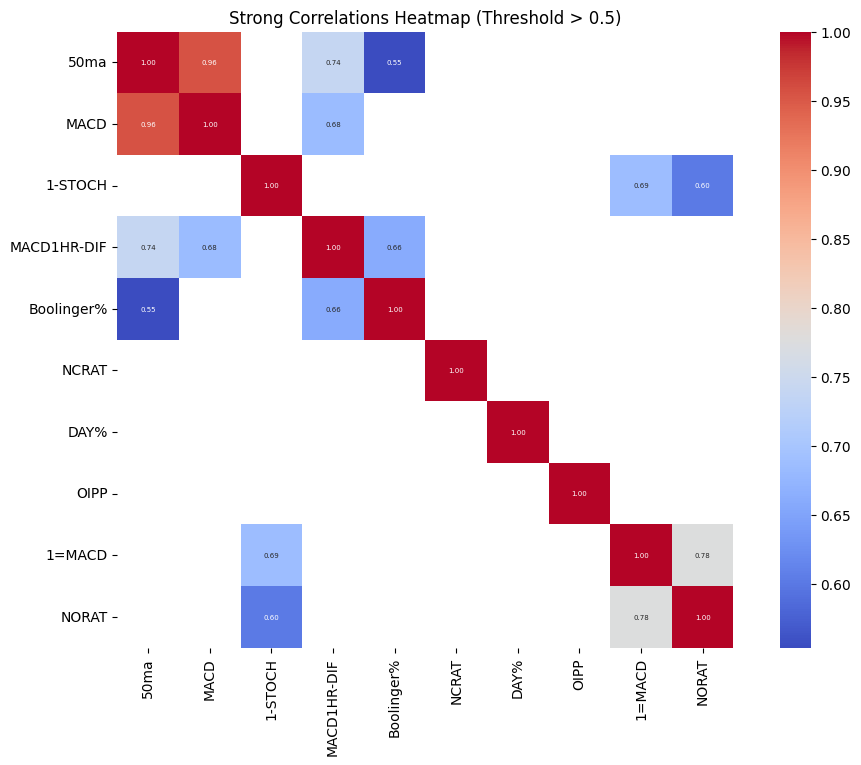

In [40]:
# Calculate the top correlation matrix
top_correlation_matrix = df[top_features].corr()

# Set a threshold for strong correlations
threshold = 0.5

# Find strongly correlated features
strong_correlations = top_correlation_matrix[(top_correlation_matrix.abs() > threshold)]

# Create a heatmap for the filtered strong correlations
plt.figure(figsize=(12, 8))
sns.heatmap(strong_correlations, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True,annot_kws={"size": 5})
plt.title("Strong Correlations Heatmap (Threshold > 0.5)")
plt.show()

**Observation**

MACD and 1=MACD, appear to have high correlation with with the other indicators (NORAT, 50MA). As such to prevent multicollinearity, it is wise to remove MACD and 1=MACD


**Conclusion**

50MA, MACDDIF, NORAT, Boolinger %, NCRAT, DAY%, and OIPP are the primarily "independent" indicators correlating with up and down of NQ Price. Note, there maybe a strong possibility that a combination of things indicators may yield higher correlation with up and down of NQ Price. Such analysis would need to be performed in the future.
